In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets  import load_diabetes
data=load_diabetes()

In [3]:
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [4]:
x=data.data
y=data.target

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr=LinearRegression()

In [10]:
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
lr.coef_

array([  23.45465406, -247.42747406,  492.1087518 ,  329.35876431,
       -970.79723039,  573.54295519,  182.42162368,  255.92168168,
        794.21609282,   89.32249214])

In [12]:
lr.intercept_

152.13623331746496

In [13]:
y_pred=lr.predict(x_test)

In [14]:
from sklearn.metrics import r2_score,mean_squared_error

In [19]:
t=r2_score(y_test,y_pred)
t2=np.sqrt(mean_squared_error(y_test,y_pred))

In [20]:
print(t,t2)

-3.9649626853383566 156.52048692675507


In [21]:
from sklearn.linear_model import Ridge

In [22]:
lm= Ridge(alpha=0.01)

In [23]:
lm.fit(x_train,y_train)

Ridge(alpha=0.01)

In [24]:
y_pred=lm.predict(x_test)

In [25]:
t=r2_score(y_test,y_pred)
t2=np.sqrt(mean_squared_error(y_test,y_pred))

In [26]:
print(t,t2)

0.5230847087541541 48.5102842644092


##Making our own ridge regression class 

In [27]:
from sklearn.datasets import make_regression

In [127]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

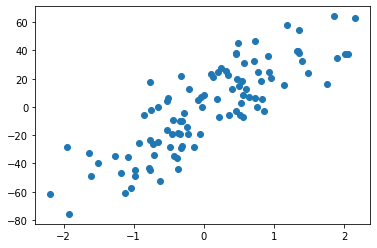

In [128]:
plt.scatter(x,y)

In [129]:
l=LinearRegression()

In [130]:
l.fit(x,y)

LinearRegression()

In [131]:
l.coef_

array([27.82809103])

In [132]:
l.intercept_

-2.29474455867698

In [133]:
r=Ridge(alpha=10)

In [134]:
r.fit(x,y)

Ridge(alpha=10)

In [135]:
rr=Ridge(alpha=100)
rr.fit(x,y)


Ridge(alpha=100)

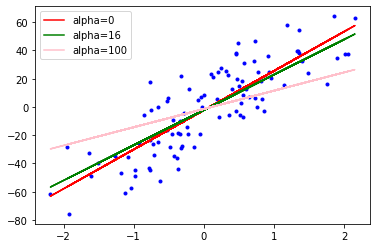

In [136]:
%matplotlib inline

plt.plot(x,y,'b.')
plt.plot(x,l.predict(x),color='red',label='alpha=0')
plt.plot(x,r.predict(x),color='green',label='alpha=16')
plt.plot(x,rr.predict(x),color='pink',label='alpha=100')
plt.legend()


In [140]:
class Myridge:

  def __init__(self,alpha=0.01):

    self.alpha=alpha
    self.b=None
    self.m=None

  def fit(self,x_test,y_test):

    num=0
    den=0
    k=(y_train-y_train.mean())
  
    num=np.sum(np.dot(k,(x_train-x_train.mean())))

    den=np.sum((x_train-x_train.mean())*(x_train-x_train.mean())) + self.alpha


    self.m=num/den
    self.b= y_train.mean() - (self.m*x_train.mean())

    print(self.m)
    print(self.b)

In [141]:
re=Myridge(10)

In [142]:
re.fit(x,y)

188.93173102620756
151.85279577348092


In [143]:
x.shape

(100, 1)

In [117]:
rr.coef_

array([12.93442104])